In [1]:
import random


from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, Image
IPythonConsole.molSize = (400,300)
IPythonConsole.ipython_useSVG=True

IPythonConsole.molSize = (400,300)
IPythonConsole.ipython_useSVG=True



In [2]:
import ga
obj = ga.GA('O=C(C)Oc1ccccc1C(=O)O', ga.VinaCost, 20, 10, crem_db_path = '/home/ale/GITLAB/bi_crem_database/replacements02_sc2.5.db')
out = obj()

[14:40:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:40:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:40:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:40:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:40:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:40:00] WARNING: not removing hydrogen atom with dummy atom neighbors


In [3]:
def drawsvg(mol, highlightAtoms=[], highlightReplacement=False, molSize=(400, 300), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        AllChem.Compute2DCoords(mc)
    if highlightReplacement:
        ids = []
        for a in mol.GetAtoms():
            if 'react_atom_idx' not in a.GetPropsAsDict():
                ids.append(a.GetIdx())
        if ids:
            highlightAtoms = ids
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc, highlightAtoms=highlightAtoms)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return SVG(svg.replace('svg:',''))


def drawgrid(mols, highlight=0):
    """
    highlight: 0 - no highlight
               1 - highlight changed atoms
               2 - highlight unchanged atoms
    """
    if highlight == 0:
        return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300,200), useSVG=True)
    else:
        ids_list = []
        for m in mols:
            ids = []
            for a in m.GetAtoms():
                if 'react_atom_idx' not in a.GetPropsAsDict():
                    ids.append(a.GetIdx())
            if highlight == 1:
                ids_list.append(ids)
            elif highlight == 2:
                ids_list.append(list(set(range(m.GetNumAtoms())) - set(ids)))
        return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300,200), 
                                    highlightAtomLists=ids_list, useSVG=True)

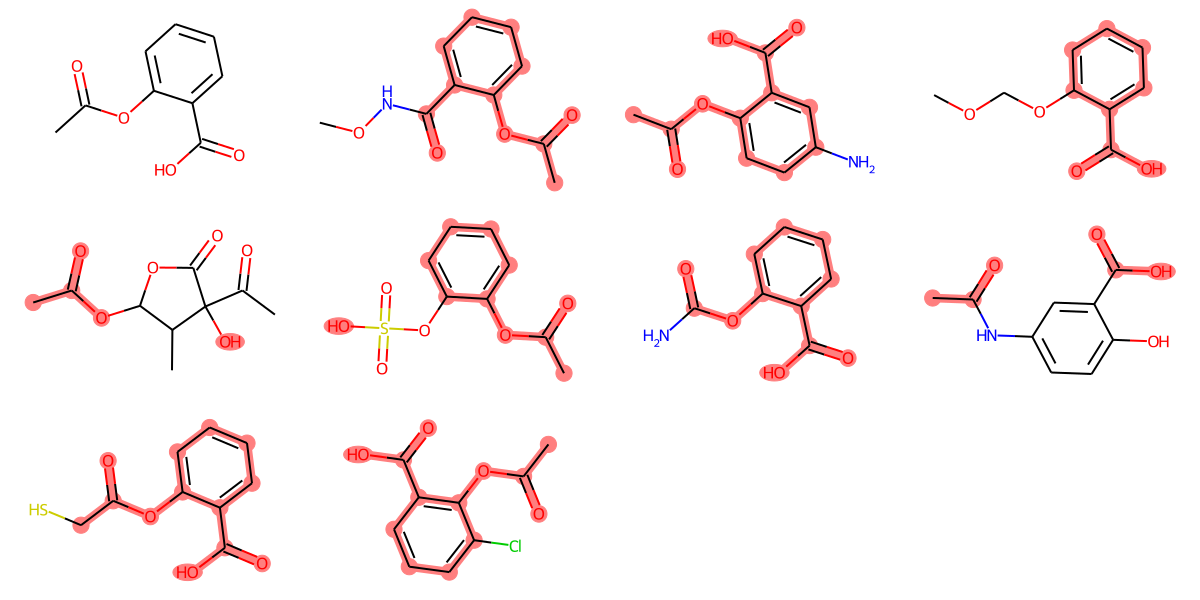

In [9]:
mols = [o.mol for o in obj.pop]
drawgrid(mols, 2)